In [1]:
import sklearn

In [2]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

    
reg.predict([[1, 1]])

array([0.8])

In [6]:
reg.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [12]:
reg.score([0, 1], [0, 1])

ValueError: Expected 2D array, got 1D array instead:
array=[0 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

# #############################################################################
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)



c:\program files\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10


Computing regularization path using the coordinate descent lasso...
Computing regularization path using the Lars lasso...


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:90: RuntimeWarning: divide by zero encountered in log10


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Computing regularization path using the Lars lasso...


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


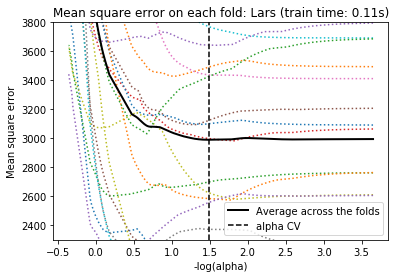

In [16]:
# #############################################################################
# LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=20).fit(X, y)
t_lasso_lars_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.cv_alphas_)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

plt.show()

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


Text(0.5,1,'Information-criterion for model selection (training time 0.007s)')

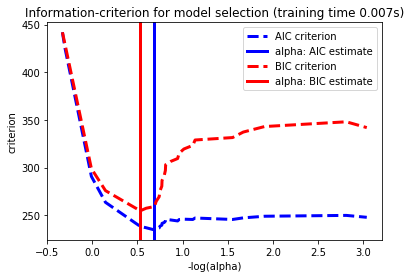

In [17]:
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)


In [18]:
type(X)

numpy.ndarray

In [19]:
type(y)

numpy.ndarray

In [22]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.02092818,
         0.01158593, -0.09476328],
       [-0.00188202, -0.04464164, -0.05147406, ...,  0.00498445,
        -0.05511324,  0.01860803],
       [ 0.08529891,  0.05068012,  0.04445121, ...,  0.00884622,
         0.03536014,  0.00848774],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.0412524 ,
         0.0044233 , -0.07749452],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.00595393,
        -0.01826693, -0.06540301],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03364831,
         0.01995779,  0.05780658]])

In [26]:
model_aic.fit

{'copy_X': True,
 'criterion': 'aic',
 'eps': 2.220446049250313e-16,
 'fit_intercept': True,
 'max_iter': 500,
 'normalize': True,
 'positive': False,
 'precompute': 'auto',
 'verbose': False}

In [27]:
model_aic.fit(X, y)

LassoLarsIC(copy_X=True, criterion='aic', eps=2.220446049250313e-16,
      fit_intercept=True, max_iter=500, normalize=True, positive=False,
      precompute='auto', verbose=False)

In [29]:
model.coef_

array([   0.        , -217.53737874,  525.7068334 ,  299.79599097,
       -112.33829458,    0.        , -244.45083874,    0.        ,
        497.66009565,   87.91659553,  -15.2825558 ,  -42.78911938,
         34.84457547,  -63.68361654,  -52.19249918,   50.18926885,
         30.04664282,  -63.80163384,  -30.17796157,   72.63780064,
         61.64153314,   47.36646391,  119.01643045,   41.84632122])